In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.jumia.com.ng/laptops/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

data = []

for product in soup.find_all("article"):
    name_tag = product.find("h3")
    price_tag = product.find("div", class_="prc")


In [ ]:
url = "https://jiji.ng/computers-and-laptops/laptops"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

items = soup.find_all("div", class_="b-list-advert__item")

data = []

for item in items:
    try:
        title = item.find("div", class_="b-advert-title-inner").text.strip()
        price = item.find("div", class_="qa-advert-price").text.strip()
        
        data.append({
            "Laptop_Details": title,
            "Price": price
        })
    except:
        pass

df = pd.DataFrame(data)
df.head()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import joblib


In [51]:
df = pd.read_csv("laptops.csv")

In [ ]:
df.isnull().sum()
df.head()
df.info()

In [35]:
# Feature Engineering
EXCHANGE_RATE = 1600
df["Price_NGN"] = df["Final Price"] * EXCHANGE_RATE
df["RAM"] = df["RAM"].astype(int)
df["CPU_Brand"] = df["CPU"].astype(str).apply(lambda x: x.split()[0])
df["GPU_Brand"] = df["GPU"].astype(str).apply(lambda x: x.split()[0])


# selecting only the columns i need for the model
cols_to_keep = ["Brand", "Status", "RAM", "Storage","Storage type", "Screen", "CPU_Brand", "GPU_Brand"]
x = df[cols_to_keep].copy()
y = df["Price_NGN"]


In [36]:
#  Encoding 
encoders = {}
categorical_cols = ["Brand", "Status", "Storage type", "CPU_Brand", "GPU_Brand"]

for col in categorical_cols:
    le = LabelEncoder()
    # We use .astype(str) to make sure there are no hidden numbers/nulls
    x[col] = le.fit_transform(x[col].astype(str))
    encoders[col] = le 


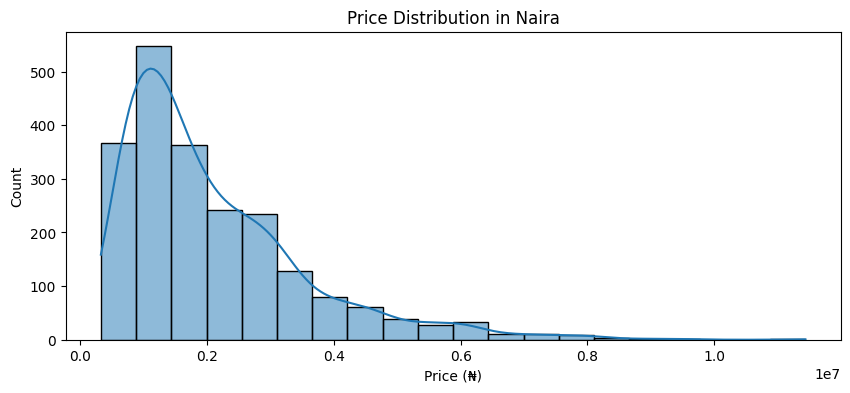

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df["Price_NGN"], bins=20, kde=True)
plt.title("Price Distribution in Naira")
plt.xlabel("Price (₦)")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
df.groupby("Brand")["Price_NGN"].median().sort_values(ascending=False).plot(kind="bar")
plt.title("Median Laptop Price by Brand")
plt.ylabel("Price (₦)")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# Training the model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_test, y_test)

predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"RMSE: ₦{rmse:,.0f}")

Train R²: 0.870
Test R²: 0.787
RMSE: ₦682,509


In [49]:
#  Save the 'Brain' of your app
joblib.dump(model, "laptop_model.pkl")
joblib.dump(encoders, "encoders.pkl")

print("Models and encoders saved successfully.")

Models and encoders saved successfully.
